<a href="https://colab.research.google.com/github/Aravinda89/multi_label_classification/blob/main/Siamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install fastai==2.0.19 fastcore==1.3.2

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.0 MB/s 
     |████████████████████████████████| 1.2 MB 56.8 MB/s 
     |████████████████████████████████| 46 kB 3.4 MB/s 
     |████████████████████████████████| 189 kB 55.5 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 51 kB 259 kB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
import fastai
print(fastai.__version__)

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

2.5.3
Mounted at /content/gdrive


In [4]:
# ! [ -e /content ] && pip install -Uqq fastai2

In [5]:
# !pip install wwf==0.0.7 

In [6]:
from fastai.vision.all import *

In [7]:
src = untar_data(URLs.PETS)/'images'

In [8]:
items = get_image_files(src)

In [9]:
items[:5]

(#5) [Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_81.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_146.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_57.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_194.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_68.jpg')]

In [10]:
len(items)

7390

In [11]:
def resized_image(fn:Path, sz=128):
  "Opens an image from `fn` and resizes it to `sz`"
  x = Image.open(fn).convert('RGB').resize((sz,sz))
  return tensor(array(x)).permute(2,0,1).float()/255.

In [12]:
img1 = resized_image(items[0], 448)
img2 = resized_image(items[1], 448)

In [18]:
class TitledImage(tuple):
  def show(self, ctx=None, **kwargs): show_titled_image(self, ctx=ctx, **kwargs)

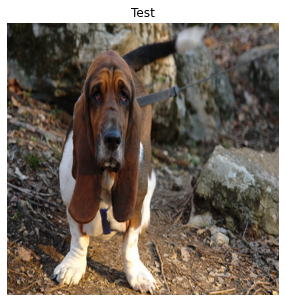

In [21]:
TitledImage((img2, 'Test')).show()